**PIA: Entrenamiento de Red Neuronal Convolucional**
Equipo:
Ana Paula Cantú Díaz 1663389

Armando Morales Olivares 1986674

David Guajardo García 1830137

Dylan Jesús Cepeda González 1942496

Hiram Said Bravo Moreno 1818152



In [27]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy
import keras

In [28]:
# cargamos los datos
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data(label_mode="fine")
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data(label_mode="coarse")
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [29]:
assert train_images.shape == (50000, 32, 32, 3)
assert test_images.shape == (10000, 32, 32, 3)
assert train_labels.shape == (50000, 1)
assert test_labels.shape == (10000, 1)

In [30]:
class_names = ['aquatic mammals','fish','flowers','food containers','fruit andvegetables',
               'household electrical devices','household furniture','insects',
               'large','carnivores','large man-made outdoor things',
               'large natural outdoor scenes', 'large omnivores and herbivores',
               'medium-sized mammals','non-insect invertebrates','people', 
               'reptiles', 'small mammals', 'trees', 'vehicles 1', 'vehicles 2']


class_names = ['beaver', 'dolphin', 'otter', 'seal', 'whale',
               'aquarium-fish', 'flatfish', 'ray', 'shark', 'trout',
               'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',
               'bottles', 'bowls', 'cans', 'cups', 'plates',
               'apples', 'mushrooms', 'oranges', 'pears', 'sweet-peppers',
               'clock', 'computer keyboard', 'lamp', 'telephone', 'television',
               'bed', 'chair', 'couch', 'table', 'wardrobe',
               'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
               'bear', 'leopard', 'lion', 'tiger', 'wolf',
               'bridge', 'castle', 'house', 'road', 'skyscraper',
               'cloud', 'forest', 'mountain', 'plain', 'sea',
               'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
               'fox', 'porcupine', 'possum', 'raccoon', 'skunk',
               'crab', 'lobster', 'snail', 'spider', 'worm',
               'baby', 'boy', 'girl', 'man', 'woman',
               'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',
               'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',
               'maple', 'oak', 'palm', 'pine', 'willow',
               'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train',
               'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

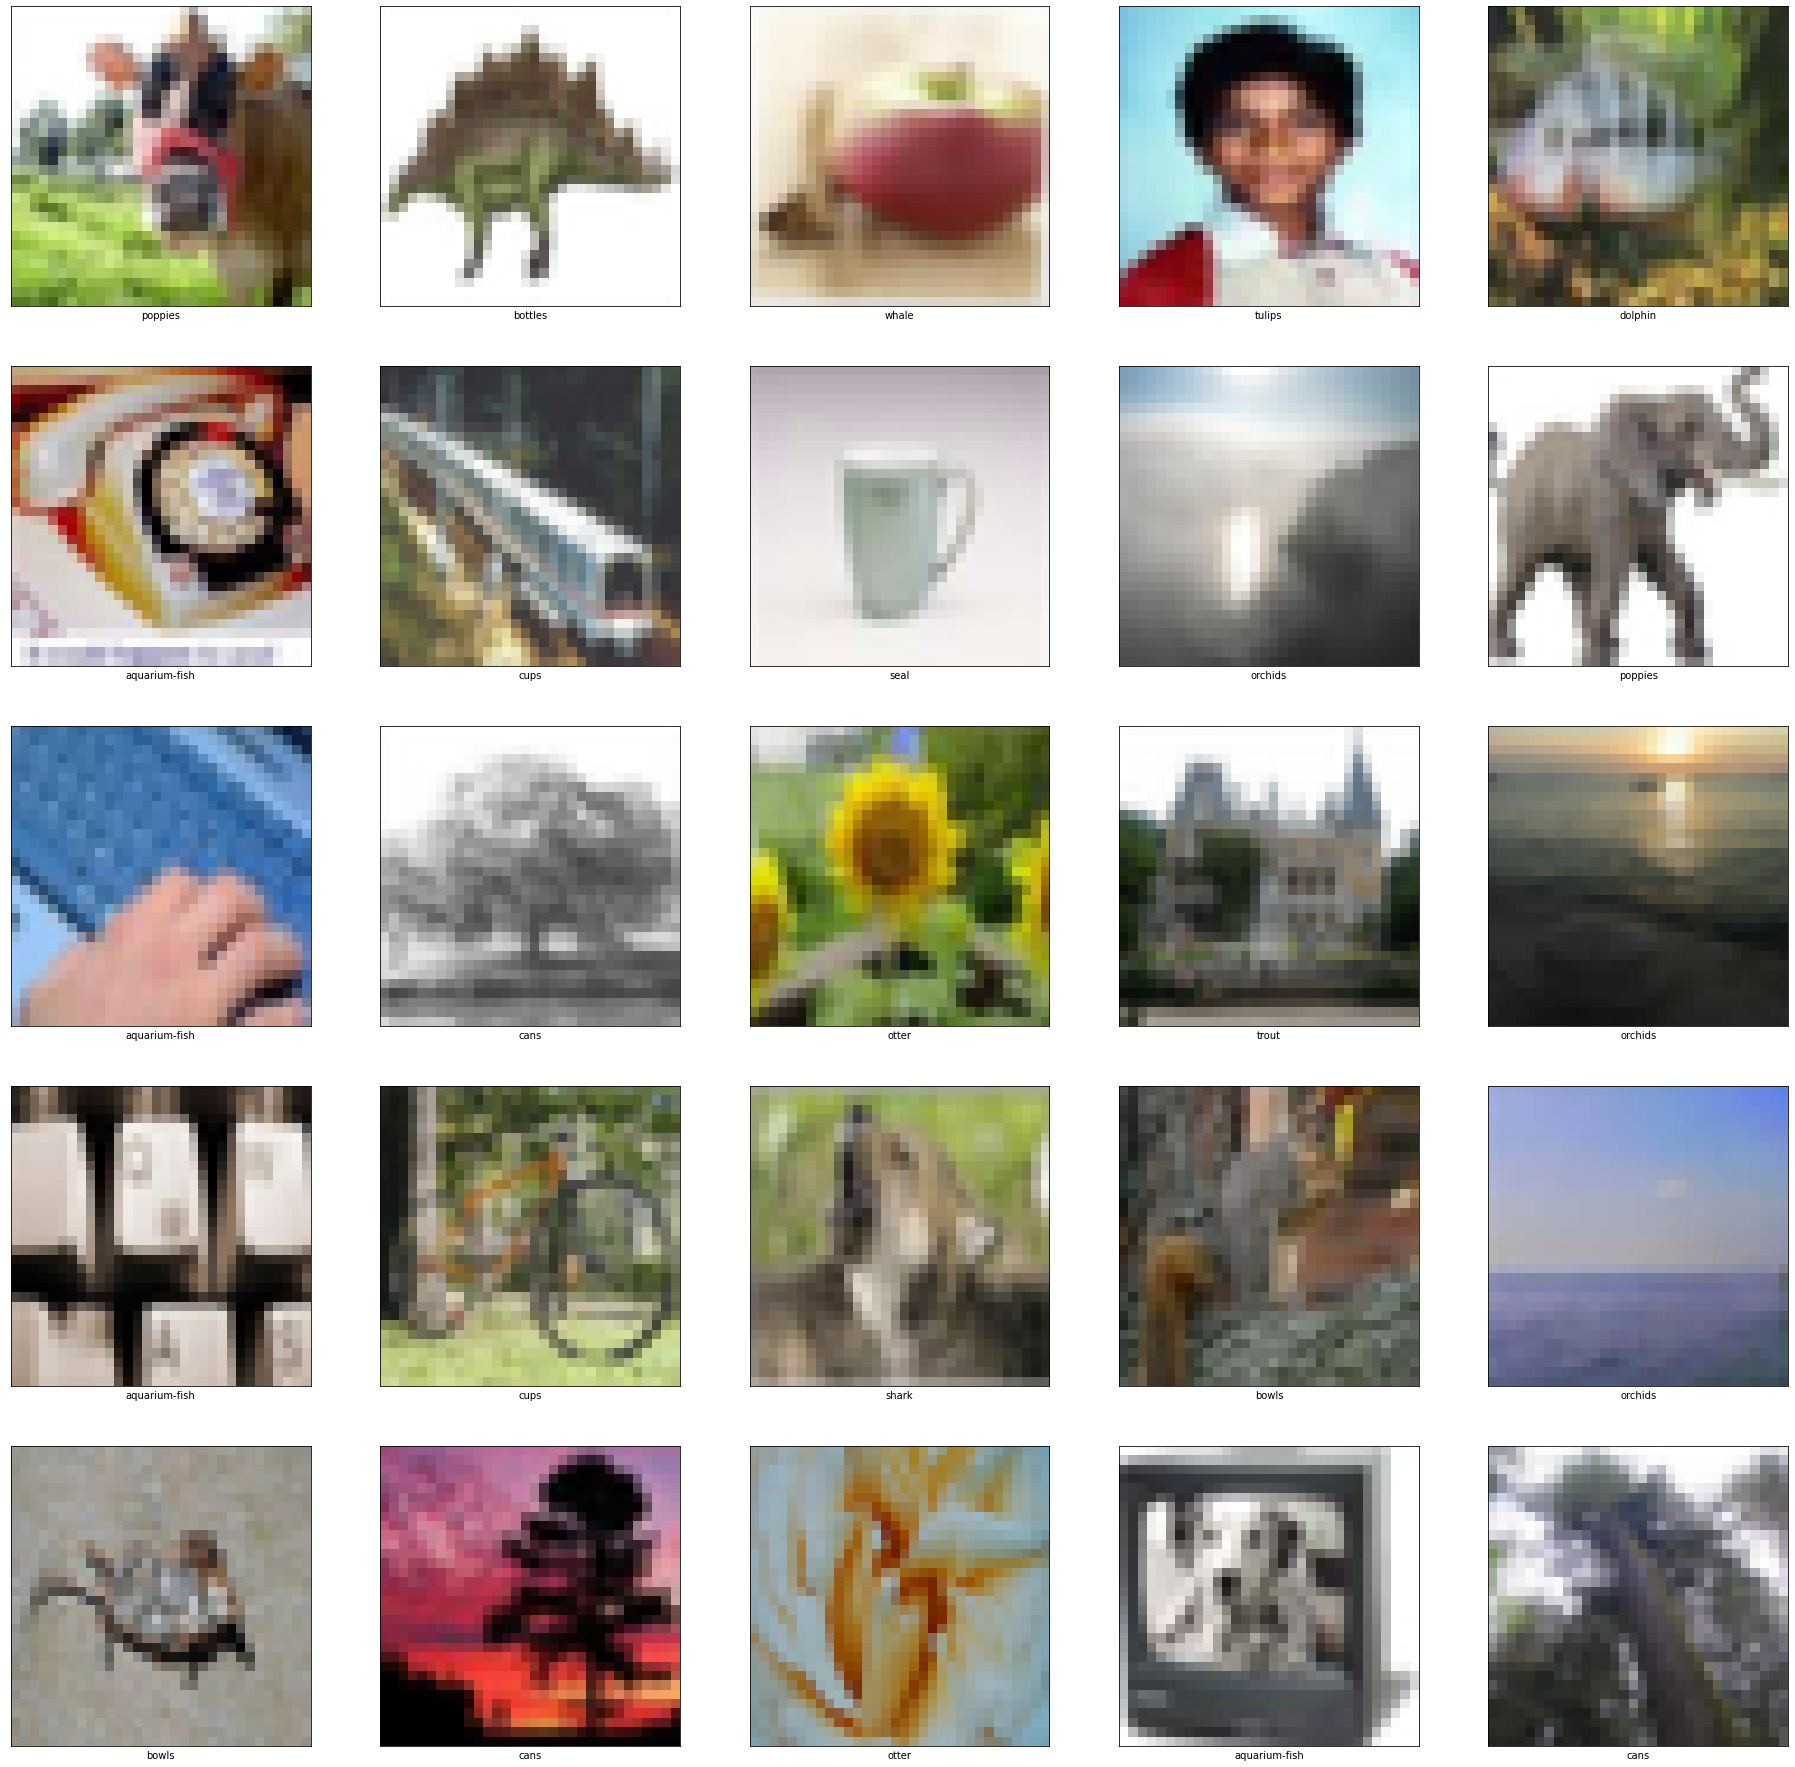

In [40]:
plt.figure(figsize=(32,32))
for i in range(0,25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [45]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 128)         147584    
                                                                 
Total params: 223,232
Trainable params: 223,232
Non-tr

In [42]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 128)         147584    
                                                                 
 flatten_5 (Flatten)         (None, 2048)             

In [43]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 178s 113ms/step - loss: 2.4542 - accuracy: 0.2447 - val_loss: 2.1733 - val_accuracy: 0.3241
Epoch 2/20
1563/1563 [==============================] - 178s 114ms/step - loss: 2.0076 - accuracy: 0.3787 - val_loss: 1.9214 - val_accuracy: 0.4062
Epoch 3/20
1563/1563 [==============================] - 173s 111ms/step - loss: 1.7986 - accuracy: 0.4416 - val_loss: 1.7859 - val_accuracy: 0.4417
Epoch 4/20
1563/1563 [==============================] - 172s 110ms/step - loss: 1.6516 - accuracy: 0.4841 - val_loss: 1.7732 - val_accuracy: 0.4485
Epoch 5/20
1563/1563 [==============================] - 168s 108ms/step - loss: 1.5392 - accuracy: 0.5181 - val_loss: 1.6879 - val_accuracy: 0.4767
Epoch 6/20
1563/1563 [==============================] - 169s 108ms/step - loss: 1.4365 - accuracy: 0.5471 - val_loss: 1.7089 - val_accuracy: 0.4764
Epoch 7/20
1563/1563 [==============================] - 169s 108ms/step - loss: 1.3508 - accuracy: 0.5751 - val_

313/313 - 7s - loss: 2.6285 - accuracy: 0.4683 - 7s/epoch - 23ms/step
0.4683000147342682


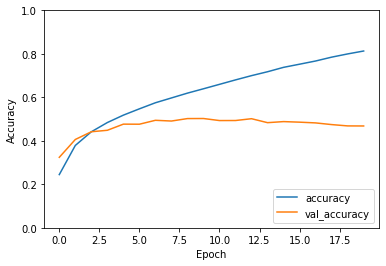

In [44]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)